In [1]:
import scipy.io as sio
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('data/dset.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'list_family', 'list_genus', 'list_species', 'X', 'Y_family', 'Y_genus', 'Y_species'])

In [4]:
Y_species = data.get('Y_species')

In [5]:
Y_species

array([[ 2],
       [ 7],
       [ 2],
       ...,
       [ 1],
       [10],
       [ 5]], dtype=int32)

In [6]:
Y_species[0]

array([2], dtype=int32)

In [7]:
Y_genus = data.get('Y_genus')

In [8]:
Y_genus

array([[1],
       [5],
       [1],
       ...,
       [1],
       [8],
       [4]], dtype=int32)

In [5]:
X_vec = data.get('X')

In [10]:
X_vec

array([[-1.        , -0.85208478, -0.5446153 , ...,  0.03081446,
        -0.04646877, -0.10260198],
       [-1.        , -0.83122403, -0.35381633, ..., -0.05976682,
        -0.04458574,  0.01394643],
       [-1.        , -0.87307382, -0.50275353, ...,  0.08532905,
        -0.01570336, -0.07587386],
       ...,
       [-1.        , -0.52845271, -0.09051293, ...,  0.00273226,
        -0.0143477 , -0.00636827],
       [-1.        , -0.8586075 , -0.27509567, ..., -0.00910596,
        -0.00653614, -0.01747479],
       [-1.        , -0.44213437,  0.002258  , ..., -0.0188348 ,
         0.01213924,  0.01604267]])

In [11]:
X_vec[0]

array([-1.        , -0.85208478, -0.5446153 , -0.23023933, -0.15827164,
       -0.10030244, -0.11154368, -0.04217562,  0.05429012, -0.01039922,
       -0.10284336, -0.02367292,  0.00542988, -0.13799486, -0.15663055,
       -0.03263575,  0.02750404,  0.01395437, -0.01718162, -0.04397875,
       -0.0025327 ,  0.03081446, -0.04646877, -0.10260198])

In [12]:
lst_species = data.get('list_species')

In [13]:
lst_species

array([[array(['AdenomeraAndre'], dtype='<U14')],
       [array(['AdenomeraHylaedactylus'], dtype='<U22')],
       [array(['Ameeregatrivittata'], dtype='<U18')],
       [array(['HylaMinuta'], dtype='<U10')],
       [array(['HypsiboasCinerascens'], dtype='<U20')],
       [array(['HypsiboasCordobae'], dtype='<U17')],
       [array(['LeptodactylusFuscus'], dtype='<U19')],
       [array(['OsteocephalusOophagus'], dtype='<U21')],
       [array(['Rhinellagranulosa'], dtype='<U17')],
       [array(['ScinaxRuber'], dtype='<U11')]], dtype=object)

In [14]:
lst_species.size

10

In [15]:
x = np.random.random((10, 5))
y = np.random.random((10, 5))

n = x.shape[1]
cov_bias = np.mean(x * y, axis=1) - np.mean(x, axis=1) * np.mean(y, axis=1)
cov_bias * n / (n-1)

array([-0.00732606, -0.05265533, -0.03277763,  0.00449224,  0.08628659,
       -0.00293715, -0.0479862 ,  0.07461408, -0.01179785, -0.02058184])

In [16]:
s = np.empty((X_vec.shape[0], 1))
for i in range(X_vec.shape[]):
    print(np.cov(X_vec[i]))

SyntaxError: invalid syntax (<ipython-input-16-4e90967b6924>, line 2)

In [6]:
res1_1 = np.cov(X_vec.T)

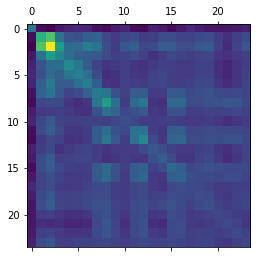

In [18]:
plt.matshow(res1_1)

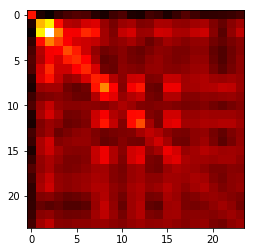

In [19]:
plt.imshow(res1_1,cmap='hot')

In [7]:
def my_mean(matrix):
    """
    Calculates mean values in a matrix
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      mu: D-by-1 column vector of sample mean values, where mu(i) = mean(matrix(:,i)).
    """
    
    # Check if the matrix is not empty to make sure we do not divide by 0.
    if matrix.shape[0] == 0:
        s = 1
    else: 
        s = matrix.shape[0]
    
    # Compute sample mean vector
    mu = (np.sum(matrix, axis=0) / s).T 

    return mu

In [8]:
my_mean(X_vec)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [9]:
np.mean(X_vec, axis=0)

array([-9.74023093e-01, -8.23533833e-01, -4.52956670e-01, -1.52934802e-01,
       -1.13522768e-01, -6.70683332e-02, -7.01563139e-02, -7.87939721e-02,
       -3.39201905e-02, -3.41943458e-02, -6.79849815e-02, -3.06505621e-02,
       -6.81939029e-04, -5.15607191e-02, -7.30336627e-02, -3.58473314e-02,
       -1.59155014e-02, -3.17948169e-02, -4.57046675e-02, -4.37078192e-02,
       -1.10627371e-02,  7.34052998e-03, -2.26644598e-02, -5.04837882e-02])

In [10]:
def my_cov(X):
    """
    Calculates covariance of a NxD matrix.
    Parameters:
      matrix: N-by-D data matrix
    Returns:
      cov: D-by-D covariance matrix.
    """
    X_mean = my_mean(X)
    X_shifted = X - X_mean
    # Using Maximum Likelihood Estimation so divide by N
    cov = (X_shifted.T @ X_shifted) / X.shape[0]
    return cov

In [11]:
res1_1_1 = my_cov(X_vec)
res1_1_1

array([[ 1.18148335e-02, -4.37619788e-03, -5.91034314e-03,
        -2.99273854e-03, -1.53964252e-03, -9.12451066e-04,
        -1.26472019e-03, -3.86707941e-03, -4.84051355e-03,
        -2.21269588e-03, -1.25272227e-03, -4.33312070e-03,
        -4.84518817e-03, -1.95811598e-03, -2.68207230e-03,
        -4.59549058e-03, -2.72668050e-03, -8.51376339e-04,
        -2.22620083e-03, -3.29719906e-03, -3.10538730e-03,
        -2.93603402e-03, -2.71759829e-03, -1.94824057e-03],
       [-4.37619788e-03,  2.29611787e-02,  2.69499550e-02,
         1.15202205e-02,  5.69689747e-03,  5.08680892e-03,
         7.70573827e-03,  8.40170570e-03,  3.82535864e-03,
         1.65207956e-03,  3.93593619e-03,  4.55515311e-03,
         2.09018294e-03,  2.48182759e-03,  5.00715371e-03,
         4.73837554e-03,  3.30238917e-03,  3.27643229e-03,
         4.29699397e-03,  4.71826900e-03,  2.06182187e-03,
         4.17402067e-04,  2.71433930e-03,  4.29424538e-03],
       [-5.91034314e-03,  2.69499550e-02,  3.94143401e

In [12]:
res1_1_1_np = np.cov(X_vec.T)
res1_1_1_np.shape

(24, 24)

In [13]:
res1_1_1 + 0.01*np.eye(24)

array([[ 2.18148335e-02, -4.37619788e-03, -5.91034314e-03,
        -2.99273854e-03, -1.53964252e-03, -9.12451066e-04,
        -1.26472019e-03, -3.86707941e-03, -4.84051355e-03,
        -2.21269588e-03, -1.25272227e-03, -4.33312070e-03,
        -4.84518817e-03, -1.95811598e-03, -2.68207230e-03,
        -4.59549058e-03, -2.72668050e-03, -8.51376339e-04,
        -2.22620083e-03, -3.29719906e-03, -3.10538730e-03,
        -2.93603402e-03, -2.71759829e-03, -1.94824057e-03],
       [-4.37619788e-03,  3.29611787e-02,  2.69499550e-02,
         1.15202205e-02,  5.69689747e-03,  5.08680892e-03,
         7.70573827e-03,  8.40170570e-03,  3.82535864e-03,
         1.65207956e-03,  3.93593619e-03,  4.55515311e-03,
         2.09018294e-03,  2.48182759e-03,  5.00715371e-03,
         4.73837554e-03,  3.30238917e-03,  3.27643229e-03,
         4.29699397e-03,  4.71826900e-03,  2.06182187e-03,
         4.17402067e-04,  2.71433930e-03,  4.29424538e-03],
       [-5.91034314e-03,  2.69499550e-02,  4.94143401e

In [14]:
res1_1_2 = np.corrcoef(X_vec.T)

In [15]:
def my_corr_1(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
#     print(stddev)
#     print(stddev[None, :])
#     c /= stddev[:, None]
#     c /= stddev[None, :]
    c /= np.dot(stddev.T, stddev)
    return c

In [18]:
def my_corr(X):
    c = my_cov(X)
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev.T @ stddev
    #c /= np.sqrt((np.dot(d.T, d)).real)
    return c

In [21]:
my_corr_1(X_vec)

array([[ 4.42757229e-02, -1.63996662e-02, -2.21488280e-02,
        -1.12151951e-02, -5.76976269e-03, -3.41938214e-03,
        -4.73949978e-03, -1.44917604e-02, -1.81396747e-02,
        -8.29200932e-03, -4.69453796e-03, -1.62382357e-02,
        -1.81571927e-02, -7.33797905e-03, -1.00509829e-02,
        -1.72214588e-02, -1.02181508e-02, -3.19050648e-03,
        -8.34261873e-03, -1.23561514e-02, -1.16373428e-02,
        -1.10026966e-02, -1.01841155e-02, -7.30097126e-03],
       [-1.63996662e-02,  8.60463065e-02,  1.00994122e-01,
         4.31716699e-02,  2.13489470e-02,  1.90626590e-02,
         2.88770157e-02,  3.14851321e-02,  1.43354131e-02,
         6.19111702e-03,  1.47497991e-02,  1.70702953e-02,
         7.83289590e-03,  9.30057208e-03,  1.87641536e-02,
         1.77569157e-02,  1.23756012e-02,  1.22783286e-02,
         1.61028519e-02,  1.76815671e-02,  7.72661365e-03,
         1.56420133e-03,  1.01719025e-02,  1.60925517e-02],
       [-2.21488280e-02,  1.00994122e-01,  1.47704020e

In [29]:
my_corr(X_vec)

array([[ 1.        , -0.26569664, -0.27388722, -0.2275954 , -0.11359838,
        -0.0720121 , -0.10184146, -0.31592877, -0.3162536 , -0.21693252,
        -0.16177248, -0.37799487, -0.35673394, -0.22545572, -0.28424795,
        -0.43105668, -0.26997946, -0.11865601, -0.29695295, -0.4134921 ,
        -0.47072915, -0.40999501, -0.38736071, -0.2890198 ],
       [-0.26569664,  1.        ,  0.89584696,  0.62845215,  0.30151392,
         0.28797715,  0.44510365,  0.4923685 ,  0.17928044,  0.11618515,
         0.36459827,  0.28503934,  0.11039129,  0.20497985,  0.38065759,
         0.3188223 ,  0.23455324,  0.3275564 ,  0.41115422,  0.42444504,
         0.22419358,  0.04181083,  0.27753078,  0.45697093],
       [-0.27388722,  0.89584696,  1.        ,  0.80485574,  0.41013691,
         0.43051758,  0.58452342,  0.5265494 ,  0.15671599,  0.11519413,
         0.46906751,  0.37005141,  0.15963272,  0.26074599,  0.4315103 ,
         0.36196256,  0.26791028,  0.3665189 ,  0.48251816,  0.50496174,
  

In [30]:
l = np.array([1,2,3])

In [31]:
l[None, :]

array([[1, 2, 3]])

In [32]:
def my_corr_1(X):
    c = my_cov(X)
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    std_dev = np.sqrt(d.real)
    c /= (std_dev[:, None] * std_dev[None, :])
    
    return c

In [33]:
my_corr_1(X_vec) - np.corrcoef(X_vec.T)

array([[-1.11022302e-16,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  1.38777878e-17,  0.00000000e+00,
         1.38777878e-17,  5.55111512e-17,  5.55111512e-17,
         5.55111512e-17,  5.55111512e-17,  0.00000000e+00,
         5.55111512e-17,  5.55111512e-17,  5.55111512e-17,
         0.00000000e+00,  0.00000000e+00,  2.77555756e-17,
         5.55111512e-17,  5.55111512e-17,  1.11022302e-16,
        -5.55111512e-17, -5.55111512e-17,  1.11022302e-16],
       [ 0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
         1.38777878e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  2.77555756e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.93889390e-18,  5.55111512e-17,  0.00000000e+00],
       [ 5.55111512e-17,  1.11022302e-16,  1.11022302e

In [22]:
import scipy.linalg as linalg

In [23]:
eig_vals, eigen_vecs = linalg.eig(res1_1)

In [24]:
eig_vals.real

array([1.17617347e-01, 5.56809523e-02, 2.36916919e-02, 1.57641029e-02,
       1.09351768e-02, 8.87613147e-03, 8.34353675e-03, 6.03674048e-03,
       4.45411585e-03, 3.99328186e-03, 3.43976698e-03, 2.12816751e-03,
       1.65638180e-03, 1.46650536e-03, 1.27367717e-03, 5.91667445e-04,
       3.93182029e-04, 2.47898342e-04, 1.26810864e-04, 8.27694401e-05,
       5.09398571e-05, 2.79905539e-05, 1.25722128e-05, 1.80733674e-05])

In [25]:
eig_vals_np, eig_vecs_np = np.linalg.eig(res1_1)

In [26]:
idx = np.argsort(eig_vals_np)[::-1]
EVals = eig_vals_np[idx]
EVecs = eig_vecs_np[:, idx]
EVecs_1 = eig_vecs_np[:, idx]

In [27]:
for i in range(0, EVecs.shape[1]):
    if EVecs[:, i][0] < 0:
        EVecs[:, i] *= -1
EVecs

array([[ 1.36684682e-01,  8.79561052e-02,  1.04043056e-01,
         2.15364587e-01,  6.74122431e-01,  5.27498365e-01,
         1.56956434e-01,  1.54107220e-01,  8.40722788e-02,
         1.70873273e-01,  2.40028779e-01,  9.83511013e-02,
         1.61402470e-01,  8.88755355e-03,  3.95240430e-02,
         3.65798246e-02,  3.27355926e-02,  3.67559782e-02,
         1.54202101e-02,  3.13612308e-03,  5.74640928e-03,
         2.36421230e-03,  6.86891160e-04,  1.53160670e-03],
       [-3.24468121e-01,  2.72571484e-01, -4.27963759e-01,
         8.44055763e-04,  4.60949695e-02, -2.66832106e-02,
         1.47972399e-01,  1.65109110e-01, -4.25561619e-01,
        -1.89486558e-01,  3.99552368e-01, -1.77223964e-01,
        -2.94207213e-02, -2.46094281e-01,  1.28477226e-01,
        -2.93684795e-01,  6.21836116e-02,  1.87504696e-02,
        -9.26299876e-02,  1.05489287e-02,  5.67150746e-03,
        -6.00040090e-03, -2.82918830e-03, -6.95609696e-03],
       [-4.72124233e-01,  4.05143681e-01, -3.71925312e

In [30]:
cum_var = np.cumsum(EVals)

In [31]:
size = EVals.size - 1

In [32]:
req_cov_lst = [0.70, 0.80, 0.90, 0.95]
MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
for i, cov_for in enumerate(req_cov_lst):
    for k in range(size):
        if cum_var[k]/cum_var[size] >= cov_for:
            MinDims[i] = k
            break

In [33]:
MinDims

array([2, 4, 6, 9], dtype=int32)

In [34]:
def task1_3(X):
    # Input:
    # X: N * D matrix (double)
    # Output:
    # Evecs: D-by-D matrix (double) contains all eigenvectors as columns
    # NB: follow the Task 1.3 specifications on eigenvectors.
    # EVals: Eigenvalues in descending order, D x 1 vector
    # (Note that the i-th columns of Evecs should corresponds to the i-th element in EVals)

    covar_mat = X
    eigen_vals, eigen_vecs = np.linalg.eig(covar_mat)
    idx = np.argsort(eigen_vals)[::-1]
    EVals = eigen_vals[idx]
    EVecs = eigen_vecs[:, idx]

    # Change direction of negative evecs
    np.apply_along_axis(lambda x : x*(-1) if x[0] < 0 else x, 0, EVecs)
    # caluclate the cumulative variance
    cum_var = np.cumsum(EVals)
    # calculate min number of PCA dimensions required for the following percentages
    req_cov_lst = [0.70, 0.80, 0.90, 0.95]
    MinDims = np.zeros((len(req_cov_lst),), dtype=np.int32)
    for i, cov_for in enumerate(req_cov_lst):
        for k in range(EVals.size):
            if cum_var[k]/cum_var[EVals.size - 1] >= cov_for:
                MinDims[i] = k
                break
    sio.savemat('t1_EVecs.mat', mdict={'EVecs': EVecs})
    sio.savemat('t1_EVals.mat', mdict={'EVals': EVals})
    sio.savemat('t1_Cumvar.mat', mdict={'Cumvar': cum_var})
    sio.savemat('t1_MinDims.mat', mdict={'MinDims': MinDims})



In [64]:
#task1_3(res1_1)

[0.11761735 0.1732983  0.19698999 0.21275409 0.22368927 0.2325654
 0.24090894 0.24694568 0.2513998  0.25539308 0.25883284 0.26096101
 0.26261739 0.2640839  0.26535758 0.26594924 0.26634243 0.26659032
 0.26671713 0.2667999  0.26685084 0.26687883 0.26689691 0.26690948]


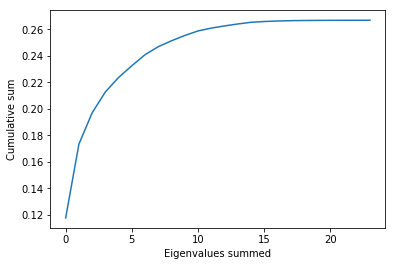

In [35]:
fig, ax = plt.subplots()
print(cum_var)
ax.plot(cum_var)
# ax.axhline(y=0.27, linestyle="--")
plt.xlabel("Eigenvalues summed")
plt.ylabel("Cumulative sum")
plt.savefig('cumvar.png')

In [67]:
X_mean = my_mean(X_vec)
X_shifted = X_vec - X_mean
P = eig_vecs_np.T.dot(X_shifted.T)

In [68]:
plt.scatter(P)

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
P

In [36]:
from sklearn.preprocessing import StandardScaler
X_vec = StandardScaler().fit_transform(X_vec)

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_vec)
print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
target_class = pd.DataFrame(data = Y_species, columns= ['target'])

[[ 0.22549159 -1.5231426 ]
 [-0.83923136  1.07772884]
 [ 0.02887795 -1.6955516 ]
 ...
 [-2.44198877  1.94661572]
 [-1.82651049  0.941203  ]
 [-3.05941854  2.93123338]]


In [38]:
finalDf = pd.concat([principalDf, target_class[['target']]], axis = 1)

In [39]:
finalDf.head()

,principal component 1,principal component 2,target
0,0.225492,-1.523143,2
1,-0.839231,1.077729,7
2,0.028878,-1.695552,2
3,-1.724178,1.435945,6
4,-1.417346,-1.569278,2


In [40]:
np.unique(Y_species)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [41]:
import matplotlib.colors as mcolors

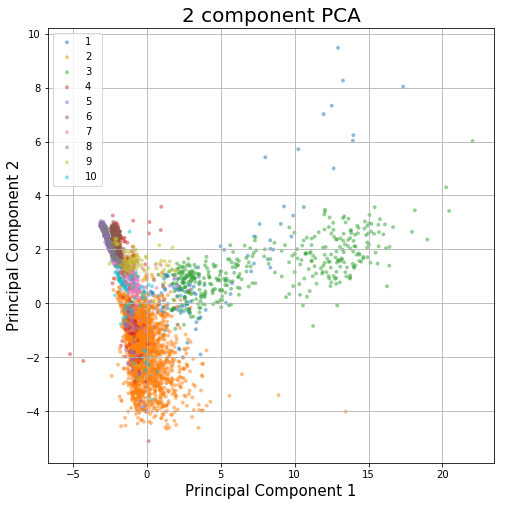

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(Y_species)
colors = mcolors.TABLEAU_COLORS

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , edgecolor='none'
               , alpha=0.5
               , s = 15
              )
ax.legend(targets)
ax.grid()
plt.savefig('2d-pca.png')

In [43]:
Nc = np.count_nonzero(Y_species == 11)
Nc

0

In [44]:
pmap = np.zeros((len(X_vec), 1))

In [45]:
def my_k_folds(X, Y, k_folds):
    # Assuming classes follow the pattern 1..C;
    # C becomes the total no. of classes
    no_of_classes = np.max(Y)
    p_map = np.zeros((len(X), 1))
    
    for c in range(1, no_of_classes+1):
        Nc = np.count_nonzero(Y == c)
        Mc = int(np.floor(Nc / k_folds))
        # find indexes of all places where the element is c
        idxs = np.apply_along_axis(lambda x: x[0], 1, np.argwhere(Y == c))
        # split the idxs based on k_folds and Mc
        sub_arrs = _split(idxs, k_folds, Mc)
        for i in range(len(sub_arrs)):
            p_map[sub_arrs[i]] = i + 1
            
    return p_map

In [46]:
def my_k_folds_1(X, Y, k_folds):
    # Assuming classes follow the pattern 1..C;
    # C becomes the total no. of classes
    no_of_classes = np.max(Y)
    p_map = np.zeros((len(X), 1))
    
    for c in range(1, no_of_classes+1):
        Nc = sum(Y == c)[0]
        Mc = int(np.floor(Nc / k_folds))
        
        currentIndexX = 0
        
        for k in range(1,k_folds):
            currentIndexBin = 1

            while currentIndexBin <= Mc:
                if Y[currentIndexX] == c:
                    p_map[currentIndexX] = k
                    currentIndexBin = currentIndexBin + 1

                currentIndexX = currentIndexX + 1

        while currentIndexX < len(X):
            if Y[currentIndexX] == c:
                p_map[currentIndexX] = k_folds
            currentIndexX = currentIndexX + 1
    return p_map

In [273]:
a = np.argwhere(Y_species == 1)

In [267]:
ids = np.apply_along_axis(f, 1, a)

In [47]:
def _split(X, k, mc):
    curr = 1
    sub_arrays = []
    for i in range(k):
        if curr != k:
            start = i*mc
            end = i*mc + mc
            sub_arrays.append(X[start:end])
        else:
            start = i*mc
            sub_arrays.append(X[start:])
        curr += 1
    return sub_arrays

In [48]:
p_map = my_k_folds(X_vec, Y_species, 5)

In [271]:
p_map_1 = my_k_folds_1(X_vec, Y_species, 5)

In [272]:
sio.savemat("t1_mgc_5cv_PMap.mat", {"PMap": p_map})

In [49]:
from scipy.stats import multivariate_normal

In [50]:
def MyConfusionMatrix(y_actual, y_pred):
    '''
    Parameters:
        y_actual: actual labels
        y_pred: predicted labels of data
    Returns:
        CM: Confusion matrix for the data as a 2d numpy array
    '''
    if(y_actual.shape[0] != y_pred.shape[0]):
        raise ValueError("Vectors supplied must be of same length")
    
    # Convert the arrays to int32 to avoid indexing errors
    y_actual = y_actual.astype(np.int32, copy=False)
    y_pred = y_pred.astype(np.int32, copy=False)
    
    # Minimum and maximum values in order to know the size of the confusion matrix and how to access it
    # Problems come from classes indexing beginning with 1 and data array indexing with 0
    max_actual = np.max(y_actual)
    max_predicted = np.max(y_pred)
    min_actual = np.min(y_actual)
    min_predicted = np.min(y_pred)

    N = max_actual + 1 if min_actual == 0 else max_actual
    M = max_predicted + 1 if min_predicted == 0 else max_predicted

    confusion_matrix = np.zeros((N,M))

    for index in range(y_pred.shape[0]):
        i = y_actual[index] if min_actual == 0 else y_actual[index] - 1
        j = y_pred[index] if min_predicted == 0 else y_pred[index] - 1
        confusion_matrix[i,j] += 1

    return confusion_matrix

In [257]:
def task1_mgc_cv(X,Y,CovKind,epsilon,Kfolds):
    PMap = my_k_folds(X, Y, Kfolds)
    sio.savemat(f"t1_mgc_{Kfolds}cv_PMap.mat", {"PMap": PMap})
    no_of_classes = np.max(Y)
    total_cov_mat = np.zeros((no_of_classes, no_of_classes))
    D = X[0].size
    for p in range(1, Kfolds+1):
        Ms = np.zeros((no_of_classes, D))
        Covs = np.zeros((no_of_classes, D, D))
        priors = np.zeros((1, no_of_classes))
        
        for c in range(1, no_of_classes+1):
            train_data = X[np.where(np.logical_and(PMap != p, Y == c))[0]]
            Ms[c-1] = my_mean(train_data)
            
            if CovKind == 1:
                # Full covariance mat
                Cov = my_cov(train_data)
            elif CovKind == 2:
                # Diagonal covariance mat
                Cov = np.diag(np.diag(my_cov(train_data)))
            else:
                # Shared covariance mat
                Cov = my_cov(X)
            
            standardised_cov = Cov + epsilon * np.eye(D)
            Covs[c-1] = standardised_cov
            
            priors[:,c-1] = len(train_data) / len(X[np.where(PMap != p)[0]])
            
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_Ms.mat", {"Ms": Ms})
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_ck{CovKind}_Covs.mat", {"Covs": Covs})
        
        
        test_data = X[np.where(PMap == p)[0]]
        test_likelihoods = np.zeros((len(test_data), no_of_classes))
        
        for i in range(len(test_data)):
            for c in range(1, no_of_classes+1):
                    test_likelihoods[i, c-1] = multivariate_normal.pdf(test_data[i]
                                                            , Ms[c-1]
                                                            , np.squeeze(Covs[c-1])
                                                            )
        test_probs = test_likelihoods * priors
        test_preds = np.zeros((len(test_data), 1))
        
        for i in range(len(test_data)):
            curr_row_vec = test_probs[i]
            test_preds[i] = np.argmax(curr_row_vec, axis=0)

        
        CM = MyConfusionMatrix(Y[np.where(PMap == p)[0]], test_preds)
                
        sio.savemat(f"t1_mgc_{Kfolds}cv{p}_ck{CovKind}_CM.mat", {"CM": CM})
        
        total_cov_mat = total_cov_mat + (CM / (Kfolds * len(test_data)))
    L = Kfolds + 1
    sio.savemat(f"t1_mgc_{Kfolds}cv{L}_ck{CovKind}_CM.mat", {"CM": total_cov_mat})

In [265]:
task1_mgc_cv(X_vec, Y_species, 3, 0.01, 5)

In [259]:
cov1 = sio.loadmat("t1_mgc_5cv6_ck1_CM.mat")['CM']
np.diagonal(cov1).sum()

array([[8.10583844e-02, 0.00000000e+00, 9.44510035e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.41676505e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.05903188e-01, 2.36127509e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.83497734e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.36127509e-04, 2.34984956e-03, 4.72255018e-04, 3.40499676e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.36127509e-04],
       [0.00000000e+00, 4.72255018e-04, 0.00000000e+00, 0.00000000e+00,
        6.90730091e-02, 0.00000000e+00, 0.00000000e+00, 2.36127509e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [262]:
cov2 = sio.loadmat("t1_mgc_5cv6_ck2_CM.mat")['CM']
np.diagonal(cov2).sum()

array([[2.42011654e-02, 0.00000000e+00, 7.99405873e-03, 4.72255018e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.07521804e-02,
        0.00000000e+00, 0.00000000e+00],
       [3.52477435e-03, 4.95795407e-01, 5.87462391e-03, 7.08382527e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.36127509e-04],
       [1.73648932e-02, 0.00000000e+00, 7.07487527e-02, 2.36127509e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.33084511e-04, 6.80199566e-03, 2.36127509e-04, 2.84286095e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.44510035e-04],
       [5.64992193e-03, 0.00000000e+00, 0.00000000e+00, 9.38797273e-04,
        5.98983128e-02, 0.00000000e+00, 0.00000000e+00, 2.82210458e-03,
        4.72255018e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [266]:
cov3 = sio.loadmat("t1_mgc_5cv6_ck3_CM.mat")['CM']
np.diagonal(cov3).sum()

0.963329778725673

0.8785390562516663

In [139]:
a = np.random.random_sample((10,10))

In [184]:
b = np.random.random_sample((1,10))

In [189]:
b.shape

(1, 10)

In [188]:
a.shape

(10, 10)

In [190]:
c = a * b

In [198]:
c

array([[7.48711012e-01, 9.17597025e-02, 1.26652386e-01, 5.55532781e-01,
        1.27620939e-01, 1.22155854e-01, 5.76228364e-02, 7.02479397e-02,
        3.82782636e-02, 1.74707421e-02],
       [7.47636340e-01, 3.23506716e-01, 4.71751116e-02, 8.18627913e-02,
        4.90142873e-02, 2.49768285e-01, 3.67541718e-01, 2.06745900e-02,
        5.54884284e-02, 9.08871412e-03],
       [1.07033616e-01, 4.04318579e-02, 1.20475277e-01, 4.36491700e-01,
        7.72346340e-02, 3.94470424e-01, 1.83396734e-01, 6.54143573e-02,
        1.87358892e-03, 1.64047518e-03],
       [8.30858916e-01, 1.04328433e-01, 1.49032680e-01, 5.14951781e-01,
        1.06037590e-01, 3.25583947e-01, 8.01584931e-03, 1.20288688e-02,
        8.25402506e-02, 5.58397766e-03],
       [2.29976087e-01, 1.80219978e-01, 1.41765776e-01, 1.24304889e-01,
        1.01414824e-01, 1.07817217e-01, 5.91331610e-01, 4.34351282e-02,
        8.61941676e-02, 5.92605191e-04],
       [1.41916319e-01, 3.34906370e-01, 1.14916649e-01, 1.34134186e-01,
   

In [199]:
max(c[2])

0.43649170028232853

In [193]:
for i in range(10):
    print(np.argmax(c[i], axis=0))

0
0
3
0
6
6
6
0
3
4


In [203]:
d = np.asarray([9.42751857e-056, 1.54623660e+000, 3.57524306e-023, 2.78409786e-013,
 1.27700789e-182, 3.49277054e-149, 1.09530105e-066, 7.87194041e-169,
 7.77081281e-049, 7.56924907e-127])

In [205]:
np.argmax(d, axis=0
         )

1

In [232]:
"""
(847, 1)
(847, 1)
[[ 66   0   2   0   0   0   0   3   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   4   0  27   0   0   0   0   0   0]
 [  0   0   0   0  58   0   0   1   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  1   0   0   0   0   0  29   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(847, 1)
(847, 1)
[[ 70   0   1   0   0   0   0   0   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   2   2  27   0   0   0   0   0   0]
 [  0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   1   0   0   0   0   0  14]]
(847, 1)
(847, 1)
[[ 69   0   1   0   0   0   0   1   0   0]
 [  0 429   1   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  0   1   0  29   0   0   0   0   0   1]
 [  0   2   0   0  57   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0  28   1   1   0]
 [  0   0   0   0   0   0   0  15   0   0]
 [  0   0   2   0   0   0   0   0  19   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(847, 1)
(847, 1)
[[ 69   0   0   0   0   0   0   2   0   0]
 [  0 430   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0]
 [  1   1   0  29   0   0   0   0   0   0]
 [  0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   2   0   0   0  28   0   0   0]
 [  1   0   0   0   0   0   0  14   0   0]
 [  0   0   0   0   0   0   0   0  21   0]
 [  0   0   0   0   0   0   0   0   0  15]]
(868, 1)
(868, 1)
[[ 71   0   0   0   0   0   0   0   0   0]
 [  0 434   0   0   0   0   0   0   0   0]
 [  0   0  76   0   0   0   0   0   0   0]
 [  0   2   0  33   0   0   0   0   0   0]
 [  0   0   0   0  61   0   0   0   0   0]
 [  0   0   0   0   0 103   0   0   0   0]
 [  0   0   0   0   0   0  29   2   0   0]
 [  0   0   0   0   0   0   0  17   0   0]
 [  0   0   0   1   0   0   0   0  23   0]
 [  0   0   0   0   0   0   0   0   0  16]]
"""

'\n(847, 1)\n(847, 1)\n[[ 66   0   2   0   0   0   0   3   0   0]\n [  0 430   0   0   0   0   0   0   0   0]\n [  0   0  75   0   0   0   0   0   0   0]\n [  0   4   0  27   0   0   0   0   0   0]\n [  0   0   0   0  58   0   0   1   0   0]\n [  0   0   0   0   0 100   0   0   0   0]\n [  1   0   0   0   0   0  29   0   0   0]\n [  0   0   0   0   0   0   0  15   0   0]\n [  0   0   0   0   0   0   0   0  21   0]\n [  0   0   0   0   0   0   0   0   0  15]]\n(847, 1)\n(847, 1)\n[[ 70   0   1   0   0   0   0   0   0   0]\n [  0 430   0   0   0   0   0   0   0   0]\n [  0   0  75   0   0   0   0   0   0   0]\n [  0   2   2  27   0   0   0   0   0   0]\n [  0   0   0   0  59   0   0   0   0   0]\n [  0   0   0   0   0 100   0   0   0   0]\n [  0   0   0   0   0   0  30   0   0   0]\n [  0   0   0   0   0   0   0  15   0   0]\n [  0   0   0   0   0   0   0   0  21   0]\n [  0   0   0   1   0   0   0   0   0  14]]\n(847, 1)\n(847, 1)\n[[ 69   0   1   0   0   0   0   1   0   0]\n [  0 429  

In [51]:
def classification_accuracy(confusion_matrix):
    return np.diagonal(confusion_matrix).sum()

In [70]:
PMap = my_k_folds(X_vec, Y_species,5)
# no_of_classes = np.max(Y_species)
# D = X_vec[0].size
# Ms = np.zeros((no_of_classes, D))
# Covs = np.zeros((no_of_classes, D, D))
# priors = np.zeros((1, no_of_classes))
# for p in range(1, 5+1):
#     for c in range(1, no_of_classes+1):
#         train_data = X_vec[np.where(np.logical_and(PMap != p, Y_species == c))[0]]
#         Ms[c-1] = my_mean(train_data)
#         # Full covariance mat
#         Cov = my_cov(train_data)
#         Covs[c-1] = Cov
#         priors[:,c-1] = len(train_data) / len(X_vec[np.where(PMap != p)[0]])   

In [72]:
from functools import lru_cache

In [88]:
def train_and_test_get_accuracy(X, Y, CovKind, epsilon, Kfolds):
    no_of_classes = np.max(Y)
    total_cov_mat = np.zeros((no_of_classes, no_of_classes))
    D = X[0].size
    for p in range(1, Kfolds+1):
        Ms = np.zeros((no_of_classes, D))
        Covs = np.zeros((no_of_classes, D, D))
        priors = np.zeros((1, no_of_classes))
        
        for c in range(1, no_of_classes+1):
            train_data = X[np.where(np.logical_and(PMap != p, Y == c))[0]]
            Ms[c-1] = my_mean(train_data)
            
            if CovKind == 1:
                # Full covariance mat
                Cov = my_cov(train_data)
            elif CovKind == 2:
                # Diagonal covariance mat
                Cov = np.diag(np.diag(my_cov(train_data)))
            else:
                # Shared covariance mat
                Cov = my_cov(X)
            
            standardised_cov = Cov + epsilon * np.eye(D)
            Covs[c-1] = standardised_cov
            
            priors[:,c-1] = len(train_data) / len(X[np.where(PMap != p)[0]])        
        
        test_data = X[np.where(PMap == p)[0]]
        test_likelihoods = np.zeros((len(test_data), no_of_classes))
        
        for i in range(len(test_data)):
            for c in range(1, no_of_classes+1):
                    test_likelihoods[i, c-1] = multivariate_normal.pdf(test_data[i]
                                                            , Ms[c-1]
                                                            , np.squeeze(Covs[c-1])
                                                            )
        test_probs = test_likelihoods * priors
        test_preds = np.zeros((len(test_data), 1))
        
        for i in range(len(test_data)):
            curr_row_vec = test_probs[i]
            test_preds[i] = np.argmax(curr_row_vec, axis=0)

        
        CM = MyConfusionMatrix(Y[np.where(PMap == p)[0]], test_preds)
        total_cov_mat = total_cov_mat + (CM / (Kfolds * len(test_data)))
    
    return np.diagonal(total_cov_mat).sum()

In [89]:
@lru_cache(maxsize=None)
def experiment():
    obs = {}
    start = 0.001
    step = 0.001
    stop = 0.2
    
    for i in np.arange(start, stop, step):
        print(i)
        res = train_and_test_get_accuracy(X_vec, Y_species, 1, i, 5)
        print(res)
        obs[i] = res
        print(i, obs[i])

In [91]:
#experiment()

In [94]:
res = """0.001 0.9893914003884677
0.002 0.9900940701527211
0.003 0.9910385801881404
0.004 0.9910442929504514
0.005 0.9908138782039076
0.006 0.9905777506950527
0.007 0.9905777506950527
0.008 0.9910557184750733
0.009000000000000001 0.9908195909662185
0.010000000000000002 0.9905834634573638
0.011 0.9908195909662185
0.012 0.99035304871082
0.013000000000000001 0.9898922192177324
0.014000000000000002 0.9887230071980805
0.015 0.988250752180371
0.016 0.9859009026164451
0.017 0.984023308070229
0.018000000000000002 0.9826179685417222
0.019000000000000003 0.9805099592489621
0.02 0.9783962371938911
0.021 0.9765129298853639
0.022000000000000002 0.97533229234109
0.023 0.974157367559127
0.024 0.9718075179952012
0.025 0.9706325932132384
0.026000000000000002 0.9685188711581673
0.027000000000000003 0.9673439463762044
0.028 0.9659386068476978
0.029 0.9647579693034238
0.030000000000000002 0.9631222150283735
0.031 0.9621777049929543
0.032 0.9619415774840996
0.033 0.961475035228701
0.034 0.9607666527021367
0.035 0.9598221426667175
0.036000000000000004 0.9584168031382108
0.037000000000000005 0.9579445481205012
0.038 0.9572418783562479
0.039 0.9567753361008493
0.04 0.9558308260654302
0.041 0.954892028792322
0.042 0.9541950717903798
0.043000000000000003 0.9534866892638154
0.044000000000000004 0.9527783067372511
0.045 0.9520699242106867
0.046 0.9513672544464334
0.047 0.9504284571733254
0.048 0.9487869901359639
0.049 0.9487869901359639
0.05 0.9478424801005447
0.051000000000000004 0.9469093955897475
0.052000000000000005 0.9466732680808928
0.053000000000000005 0.9466732680808928
0.054 0.946437140572038
0.055 0.946437140572038
0.056 0.9462010130631833
0.057 0.9459705983166395
0.058 0.9452736413146972
0.059000000000000004 0.9452736413146972
0.060000000000000005 0.9448070990592985
0.061 0.944334844041589
0.062 0.9440987165327341
0.063 0.9438625890238793
0.064 0.9436264615150246
0.065 0.9431599192596261
0.066 0.9431599192596261
0.067 0.9426933770042275
0.068 0.9426933770042275
0.069 0.9426876642419165
0.07 0.9426876642419165
0.07100000000000001 0.942226834748829
0.07200000000000001 0.9424629622576838
0.07300000000000001 0.9424629622576838
0.074 0.9419907072399741
0.075 0.9417545797311194
0.076 0.9417545797311194
0.077 0.9412823247134098
0.078 0.9412823247134098
0.079 0.9410461972045551
0.08 0.9410461972045551
0.081 0.9408100696957004
0.082 0.9408100696957004
0.083 0.9405796549491565
0.084 0.9405796549491565
0.085 0.9405796549491565
0.08600000000000001 0.9405796549491565
0.08700000000000001 0.9405796549491565
0.08800000000000001 0.9405796549491565
0.089 0.940107399931447
0.09 0.940107399931447
0.091 0.940107399931447
0.092 0.9398712724225922
0.093 0.9398712724225922
0.094 0.9396351449137373
0.095 0.9396351449137373
0.096 0.9396351449137373
0.097 0.9396351449137373
0.098 0.9396351449137373
0.099 0.9396351449137373
0.1 0.9396351449137373
0.101 0.9391686026583388
0.10200000000000001 0.9391686026583388
0.10300000000000001 0.9391686026583388
0.10400000000000001 0.9391686026583388
0.10500000000000001 0.9391686026583388
0.106 0.9391686026583388
0.107 0.9389324751494841
0.108 0.9386963476406293
0.109 0.9384659328940854
0.11 0.9384659328940854
0.111 0.9382298053852306
0.112 0.9379936778763759
0.113 0.9379936778763759
0.114 0.9379936778763759
0.115 0.9379936778763759
0.116 0.9379936778763759
0.117 0.9379936778763759
0.11800000000000001 0.9377575503675212
0.11900000000000001 0.9377575503675212
0.12000000000000001 0.9377575503675212
0.121 0.9375214228586664
0.122 0.9375214228586664
0.123 0.9375214228586664
0.124 0.9375214228586664
0.125 0.9372852953498115
0.126 0.9375157100963553
0.127 0.9375157100963553
0.128 0.9375157100963553
0.129 0.9375157100963553
0.13 0.9375157100963553
0.131 0.9375157100963553
0.132 0.9375157100963553
0.133 0.9375157100963553
0.134 0.9375157100963553
0.135 0.9375157100963553
0.136 0.9375157100963553
0.137 0.9375157100963553
0.138 0.9375157100963553
0.139 0.9375157100963553
0.14 0.9372852953498115
0.14100000000000001 0.9368187530944129
0.14200000000000002 0.9368187530944129
0.14300000000000002 0.9368187530944129
0.14400000000000002 0.9368187530944129
0.14500000000000002 0.9368187530944129
0.146 0.9368187530944129
0.147 0.9368187530944129
0.148 0.9365826255855582
0.149 0.9363464980767034
0.15 0.9363464980767034
0.151 0.9363464980767034
0.152 0.9363464980767034
0.153 0.9361103705678485
0.154 0.9358742430589937
0.155 0.9358742430589937
0.156 0.935638115550139
0.157 0.935638115550139
0.158 0.935638115550139
0.159 0.935638115550139
0.16 0.935638115550139
0.161 0.935638115550139
0.162 0.935638115550139
0.163 0.935638115550139
0.164 0.935638115550139
0.165 0.935638115550139
0.166 0.935638115550139
0.167 0.9349354457858856
0.168 0.9349354457858856
0.169 0.9349354457858856
0.17 0.9349354457858856
0.171 0.9349354457858856
0.17200000000000001 0.9349354457858856
0.17300000000000001 0.9349354457858856
0.17400000000000002 0.9349354457858856
0.17500000000000002 0.9349354457858856
0.17600000000000002 0.9346993182770309
0.177 0.9346993182770309
0.178 0.9346993182770309
0.179 0.9346993182770309
0.18 0.9346993182770309
0.181 0.9346993182770309
0.182 0.9346993182770309
0.183 0.9346993182770309
0.184 0.9344689035304872
0.185 0.9344689035304872
0.186 0.9344689035304872
0.187 0.9344689035304872
0.188 0.9344689035304872
0.189 0.9344689035304872
0.19 0.9344689035304872
0.191 0.9344689035304872
0.192 0.9344689035304872
0.193 0.9344689035304872
0.194 0.9344689035304872
0.195 0.9344689035304872
0.196 0.9344689035304872
0.197 0.9344689035304872
0.198 0.9344689035304872
0.199 0.9344689035304872
"""

In [104]:
a = res.splitlines()

In [105]:
arr = list(map(lambda x : x.split(" "), a))

In [108]:
arr = np.array(arr, dtype=np.float64)

In [118]:
epsilon, acccuracy = arr.T

In [119]:
epsilon

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

In [120]:
acccuracy

array([0.9893914 , 0.99009407, 0.99103858, 0.99104429, 0.99081388,
       0.99057775, 0.99057775, 0.99105572, 0.99081959, 0.99058346,
       0.99081959, 0.99035305, 0.98989222, 0.98872301, 0.98825075,
       0.9859009 , 0.98402331, 0.98261797, 0.98050996, 0.97839624,
       0.97651293, 0.97533229, 0.97415737, 0.97180752, 0.97063259,
       0.96851887, 0.96734395, 0.96593861, 0.96475797, 0.96312222,
       0.9621777 , 0.96194158, 0.96147504, 0.96076665, 0.95982214,
       0.9584168 , 0.95794455, 0.95724188, 0.95677534, 0.95583083,
       0.95489203, 0.95419507, 0.95348669, 0.95277831, 0.95206992,
       0.95136725, 0.95042846, 0.94878699, 0.94878699, 0.94784248,
       0.9469094 , 0.94667327, 0.94667327, 0.94643714, 0.94643714,
       0.94620101, 0.9459706 , 0.94527364, 0.94527364, 0.9448071 ,
       0.94433484, 0.94409872, 0.94386259, 0.94362646, 0.94315992,
       0.94315992, 0.94269338, 0.94269338, 0.94268766, 0.94268766,
       0.94222683, 0.94246296, 0.94246296, 0.94199071, 0.94175

Text(0, 0.5, 'Accuracy of predictions')

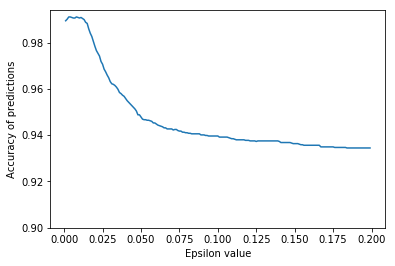

In [125]:
plt.plot(epsilon, acccuracy)
plt.ylim(bottom=0.9)
plt.xlabel("Epsilon value")
plt.ylabel("Accuracy of predictions")
